In [ ]:
#Proceso de segmentación metodo Otsu

In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

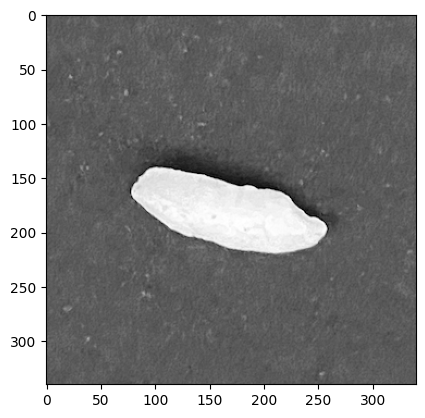

In [45]:

image = cv.imread('imagenes/onerice.png',0)
plt.imshow(image, 'gray')

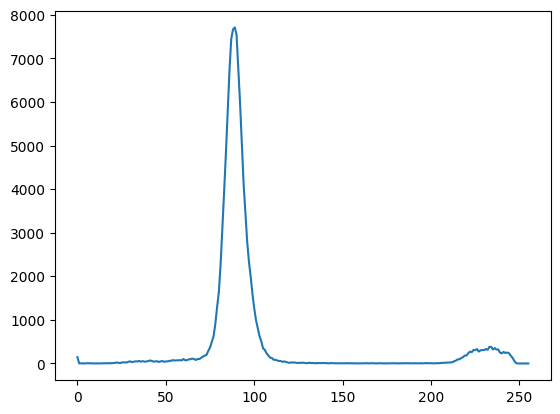

In [6]:
#Pintar el histograma
histg = cv.calcHist([image],[0],None,[256],[0,256])
plt.plot(histg) 
plt.show() 

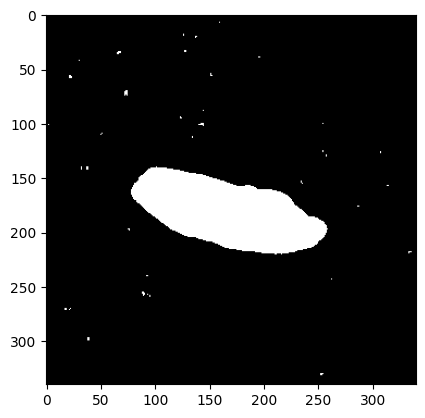

In [46]:
ret,thresh1 = cv.threshold(image,127,260,cv.THRESH_BINARY)
plt.imshow(thresh1, 'gray')

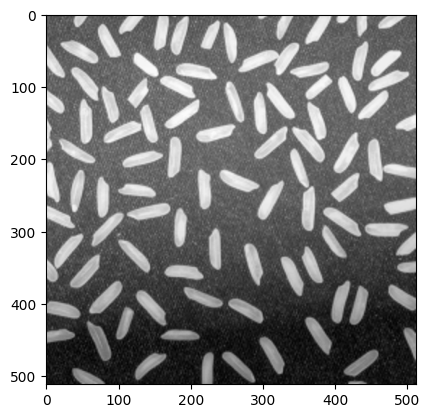

In [47]:
image_new = cv.imread('imagenes/rices.png',0)
plt.imshow(image_new, 'gray')

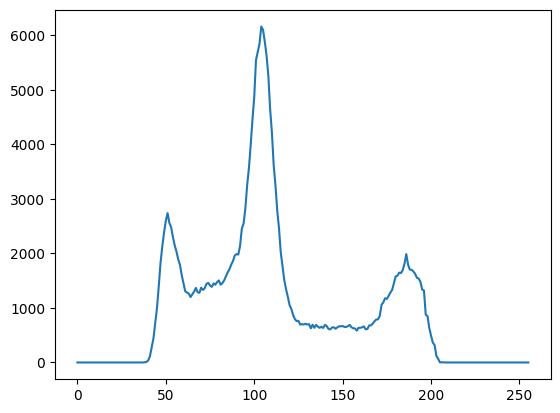

In [10]:
histg = cv.calcHist([image_new],[0],None,[256],[0,256])
plt.plot(histg) 
plt.show()

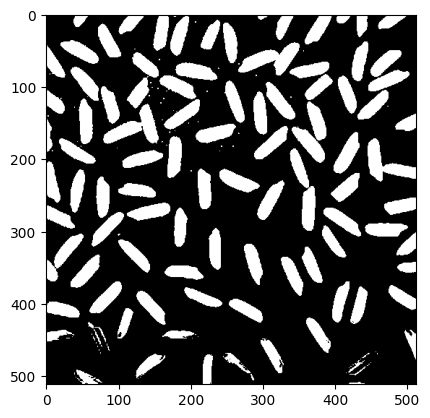

In [48]:
ret,thresh2 = cv.threshold(image_new,127,255,cv.THRESH_BINARY)
plt.imshow(thresh2, 'gray')

In [12]:
def filterImage(image):
    a,b = image.shape
    temp = np.zeros((a, b))
    i = 0
    for row in image:
        minimun = np.min(row)
        row = row - minimun
        temp[i] = row
        i = i + 1
    return temp

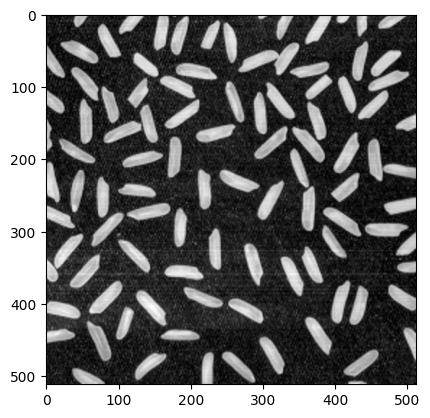

In [49]:
image_new_2 = filterImage(image_new)
image_new_2 = np.uint8(image_new_2)
plt.imshow(image_new_2, 'gray')

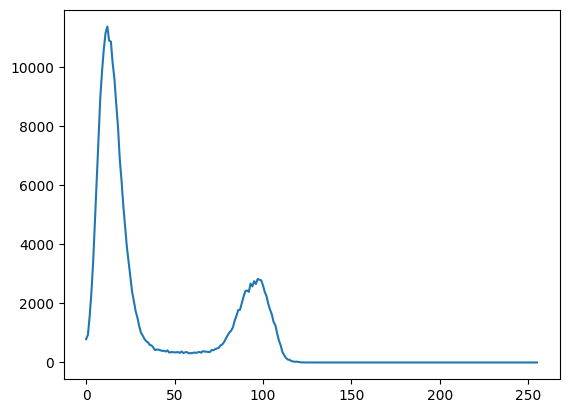

In [32]:
image_new_2 = np.uint8(image_new_2)
histg_1 = cv.calcHist([image_new_2],[0],None,[256],[0,256])
plt.plot(histg_1) 
plt.show()

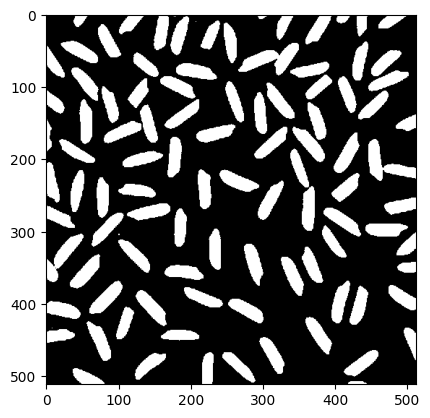

In [50]:
ret,thresh = cv.threshold(image_new_2,50,255,cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(thresh, 'gray')

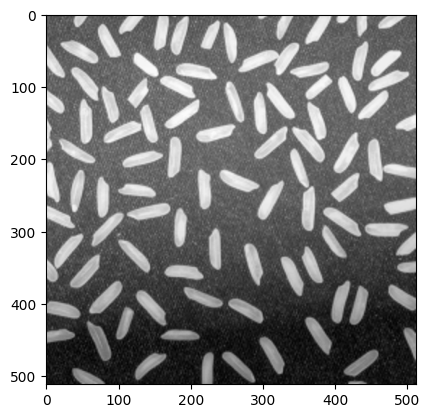

In [51]:
plt.imshow(image_new, 'gray')

In [61]:
#metodo otsu

th2 = cv.adaptiveThreshold(image_new,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,255,2)

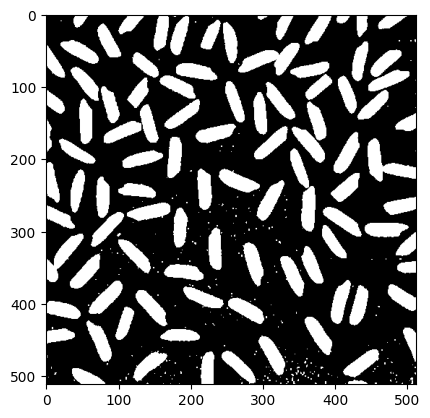

In [62]:
plt.imshow(th2, 'gray')

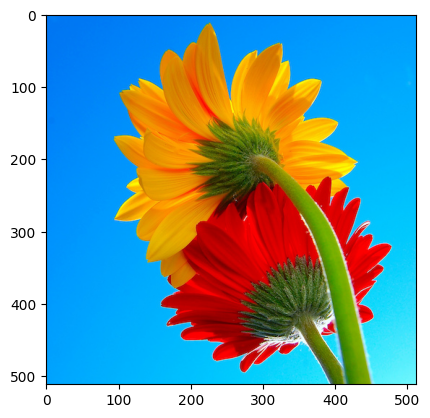

In [197]:
#Segmentación de color
image = cv.imread('imagenes/flowers.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB);
plt.imshow(image)

In [127]:
def obtenerCanaleColor(image, color):
    a,b,h = image.shape
    image_new = np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            image_new[i,j] = image[i,j, color]
    return image_new

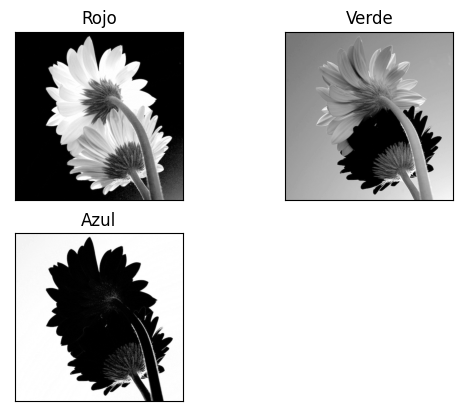

In [128]:
titles = ['Rojo','Verde', 'Azul']
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(obtenerCanaleColor(image, i),'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

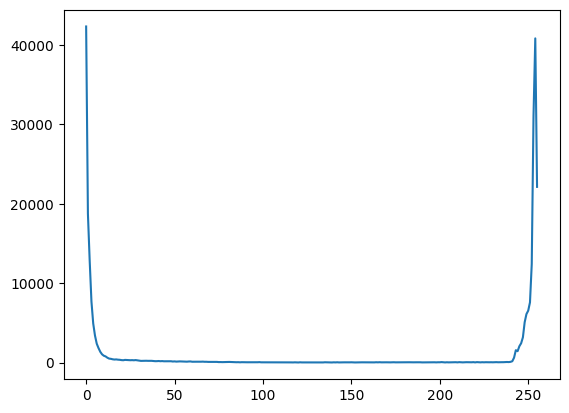

In [186]:
image_red = obtenerImgenUnSoloEscala(image, 2);
image_red = np.uint8(image_red)
histg = cv.calcHist([image_red],[0],None,[256],[0,256])
plt.plot(histg)
plt.show()

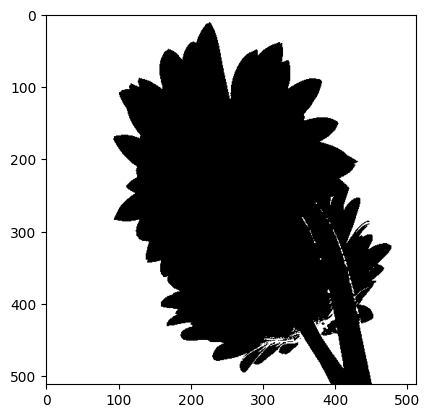

In [187]:
ret,thresh1 = cv.threshold(image_red,200,260,cv.THRESH_BINARY)
plt.imshow(thresh1, 'gray')

In [122]:
#Segementación color rojo, detección

In [184]:
def obtenerImagenColoRojo(image):
    a, b, h = image.shape
    image_new = np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            red = image[i,j, 0]
            green = image[i,j,1]
            blue = image[i,j,2]
            if red > 110 and green < 20 and blue < 20:
                image_new[i,j] = red
    return image_new

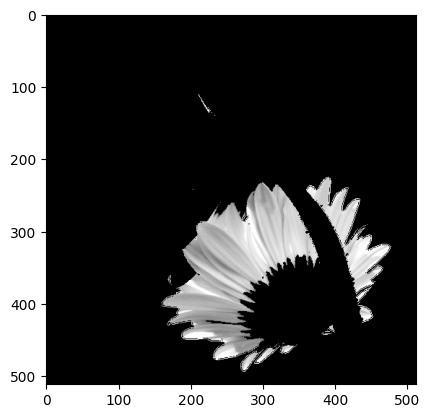

In [194]:
image_red_new = obtenerImagenColoRojo(image);
plt.imshow(image_red_new, 'gray')

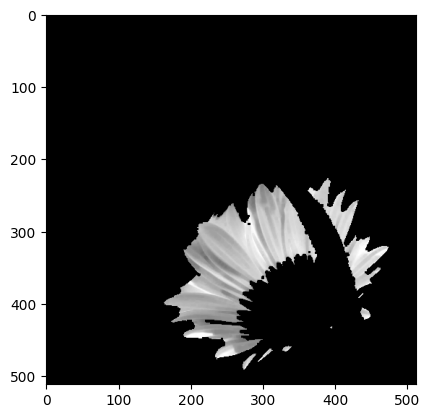

In [195]:
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(image_red_new,kernel,iterations = 1)
plt.imshow(erosion, 'gray')